In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score, precision_recall_curve)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

### 2. LOAD DATASET


In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")

Dataset Shape: (284807, 31)

First few rows:


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
print("\nClass Distribution:")
print(df['Class'].value_counts())
print("\nClass Distribution (%):")
print(df['Class'].value_counts(normalize=True) * 100)


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Class Distribution (%):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


### 3. VISUALIZATIONS

C:\Users\LEGION\AppData\Local\Temp\ipykernel_30936\1579028348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


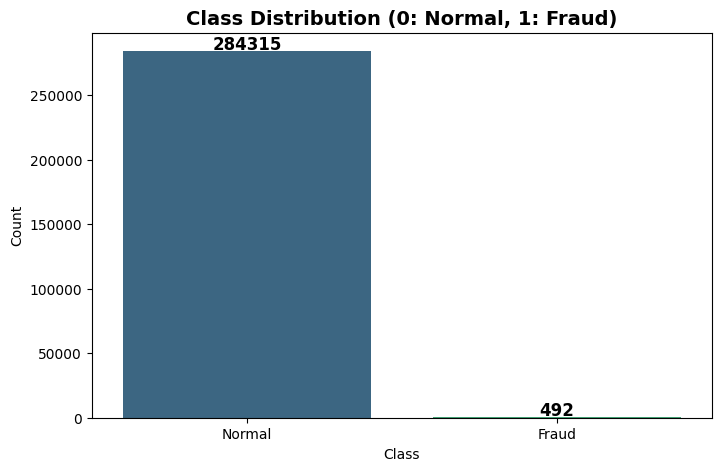

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Class Distribution (0: Normal, 1: Fraud)', fontsize=14, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Fraud'])
for i, count in enumerate(df['Class'].value_counts()):
    plt.text(i, count + 1000, str(count), ha='center', fontsize=12, fontweight='bold')
plt.show()

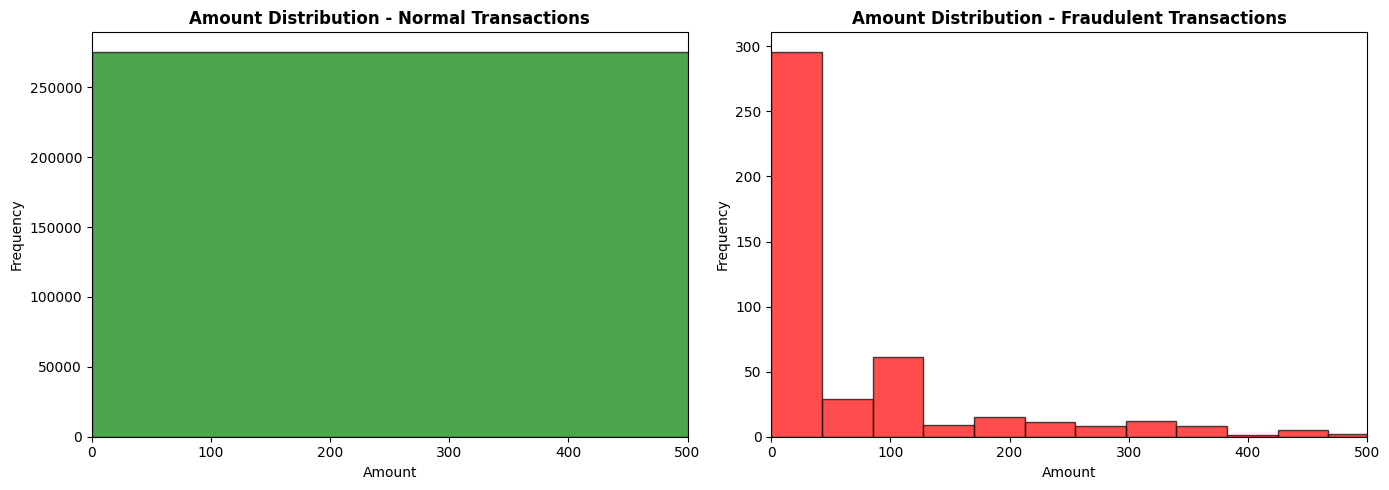

In [9]:
# Amount Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Normal transactions
axes[0].hist(df[df['Class'] == 0]['Amount'], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[0].set_title('Amount Distribution - Normal Transactions', fontweight='bold')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim([0, 500])

# Fraudulent transactions
axes[1].hist(df[df['Class'] == 1]['Amount'], bins=50, color='red', alpha=0.7, edgecolor='black')
axes[1].set_title('Amount Distribution - Fraudulent Transactions', fontweight='bold')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim([0, 500])

plt.tight_layout()
plt.show()

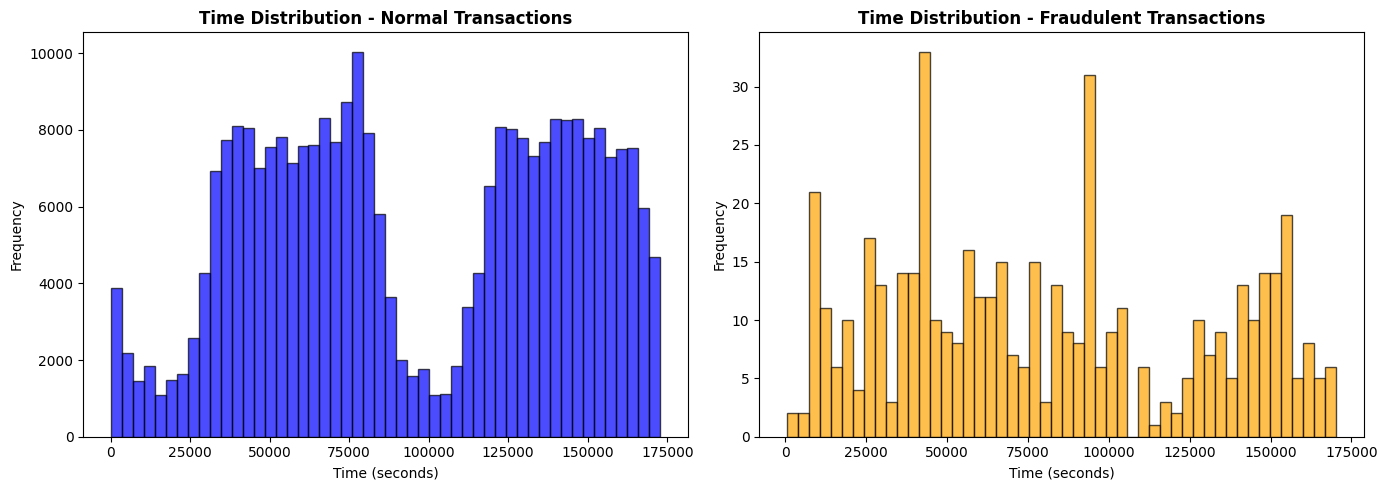

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Normal transactions
axes[0].hist(df[df['Class'] == 0]['Time'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Time Distribution - Normal Transactions', fontweight='bold')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Frequency')

# Fraudulent transactions
axes[1].hist(df[df['Class'] == 1]['Time'], bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[1].set_title('Time Distribution - Fraudulent Transactions', fontweight='bold')
axes[1].set_xlabel('Time (seconds)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

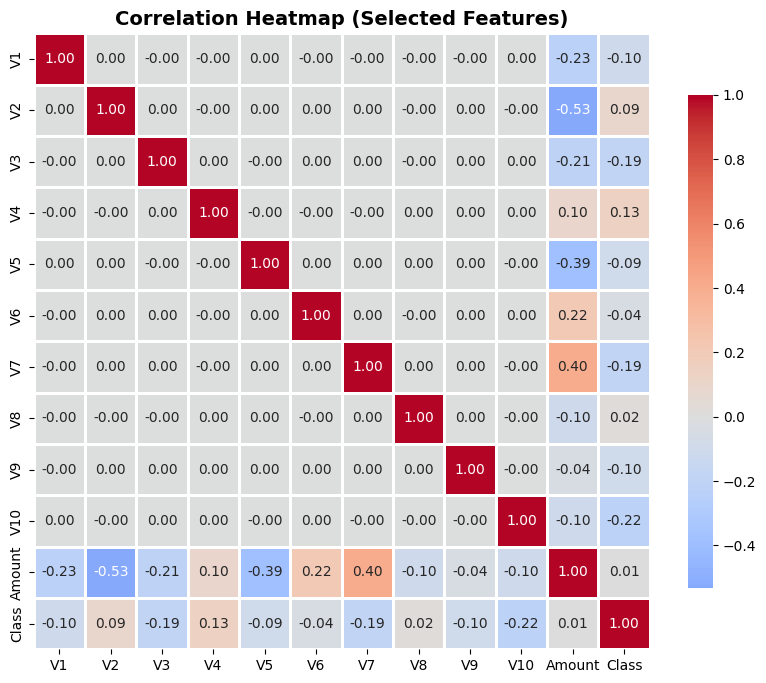

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'Amount', 'Class']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap (Selected Features)', fontsize=14, fontweight='bold')
plt.show()



### 4. DATA PREPROCESSING

In [12]:
X = df.drop('Class', axis=1)
y = df['Class']

In [13]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X['Time'] = scaler.fit_transform(X['Time'].values.reshape(-1, 1))

In [14]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature names:", X.columns.tolist())

Features shape: (284807, 30)
Target shape: (284807,)

Feature names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


### 5. TRAIN-TEST SPLIT

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set fraud cases: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.2f}%)")
print(f"Test set fraud cases: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.2f}%)")


Training set size: 227845
Test set size: 56962

Training set fraud cases: 394 (0.17%)
Test set fraud cases: 98 (0.17%)


### 6. HANDLE CLASS IMBALANCE WITH SMOTE

In [17]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [18]:
print(f"\nAfter SMOTE:")
print(f"Training set size: {X_train_smote.shape[0]}")
print(f"Class 0 (Normal): {(y_train_smote == 0).sum()}")
print(f"Class 1 (Fraud): {(y_train_smote == 1).sum()}")



After SMOTE:
Training set size: 454902
Class 0 (Normal): 227451
Class 1 (Fraud): 227451


In [19]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [20]:
results = {}

In [21]:
print("\n" + "="*60)
print("TRAINING MODELS")
print("="*60)



TRAINING MODELS


In [22]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train_smote, y_train_smote)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")



Training Logistic Regression...
Logistic Regression - Accuracy: 0.9743, Precision: 0.0581, Recall: 0.9184, F1: 0.1094, ROC-AUC: 0.9698

Training Random Forest...
Random Forest - Accuracy: 0.9995, Precision: 0.8454, Recall: 0.8367, F1: 0.8410, ROC-AUC: 0.9731

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.9867, Precision: 0.1055, Recall: 0.8980, F1: 0.1888, ROC-AUC: 0.9807


In [23]:
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)


MODEL COMPARISON


In [24]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1'] for m in results],
    'ROC-AUC': [results[m]['roc_auc'] for m in results]
})

In [25]:
print(comparison_df.to_string(index=False))

              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.974264   0.058140 0.918367  0.109356 0.969848
      Random Forest  0.999456   0.845361 0.836735  0.841026 0.973103
  Gradient Boosting  0.986728   0.105516 0.897959  0.188841 0.980743


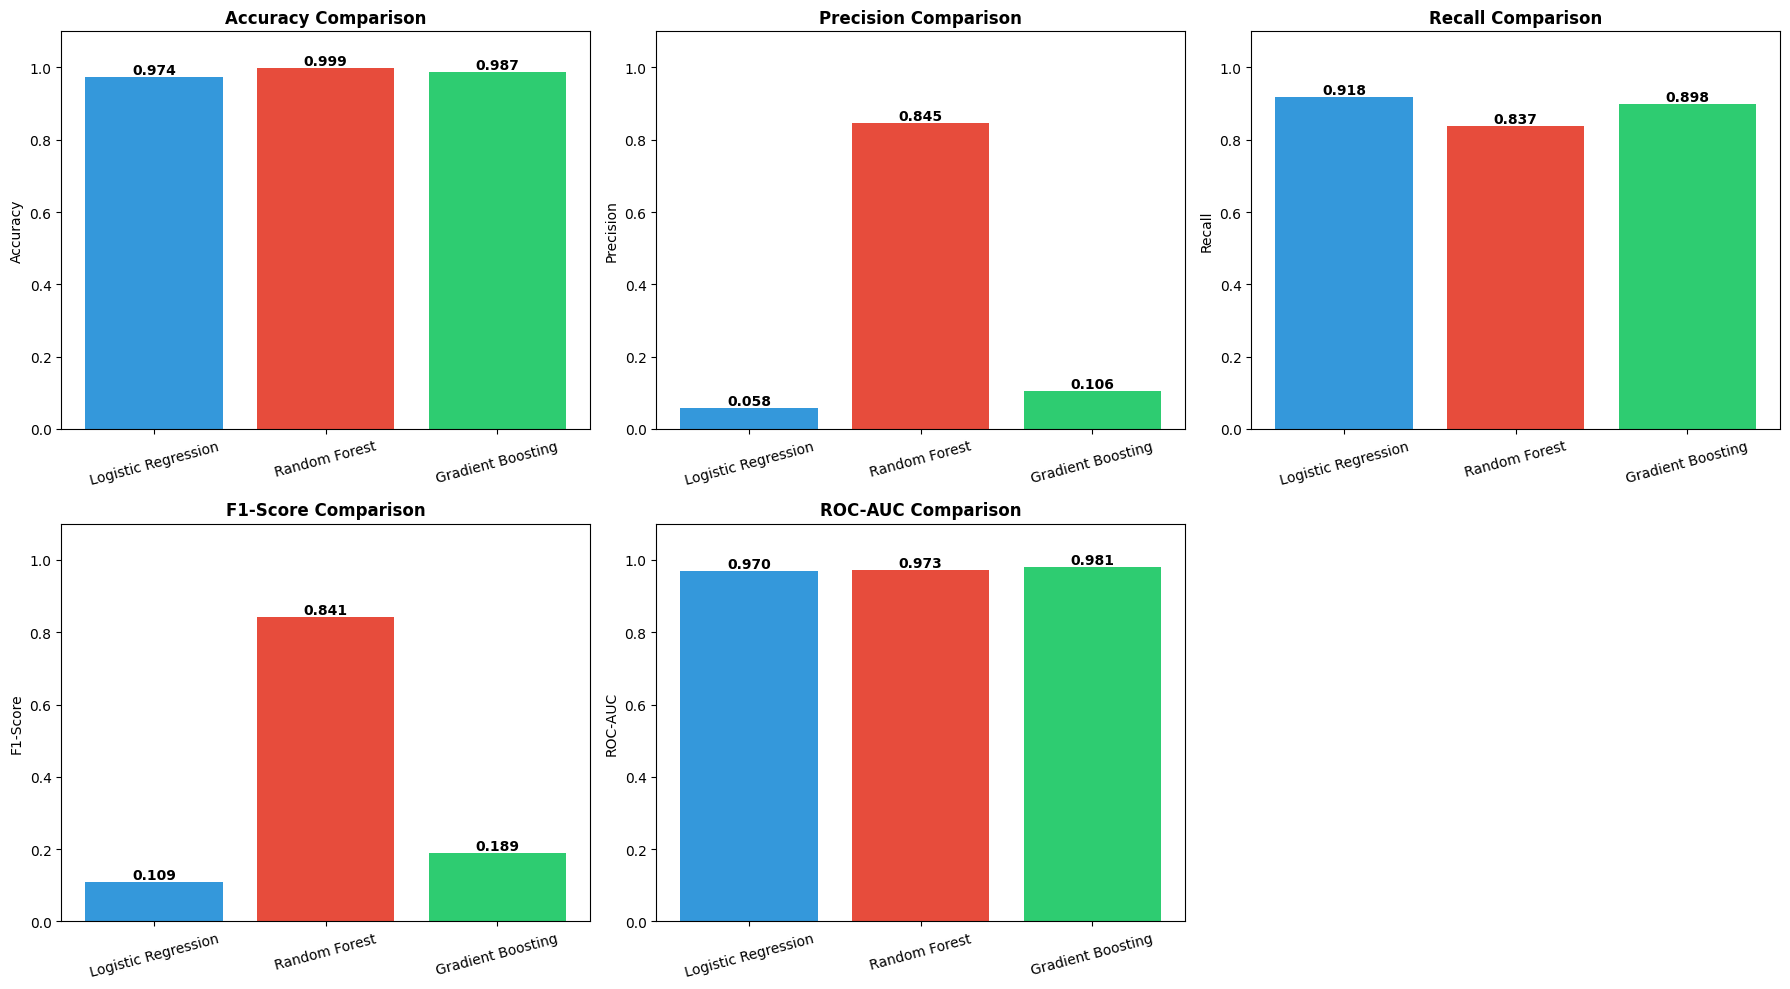

In [26]:
# Visualize Model Comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    
    ax = axes[row, col]
    bars = ax.bar(comparison_df['Model'], comparison_df[metric], 
                   color=['#3498db', '#e74c3c', '#2ecc71'])
    ax.set_title(f'{metric} Comparison', fontweight='bold', fontsize=12)
    ax.set_ylabel(metric)
    ax.set_ylim([0, 1.1])
    ax.tick_params(axis='x', rotation=15)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# Remove the last empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


### CONFUSION MATRICES

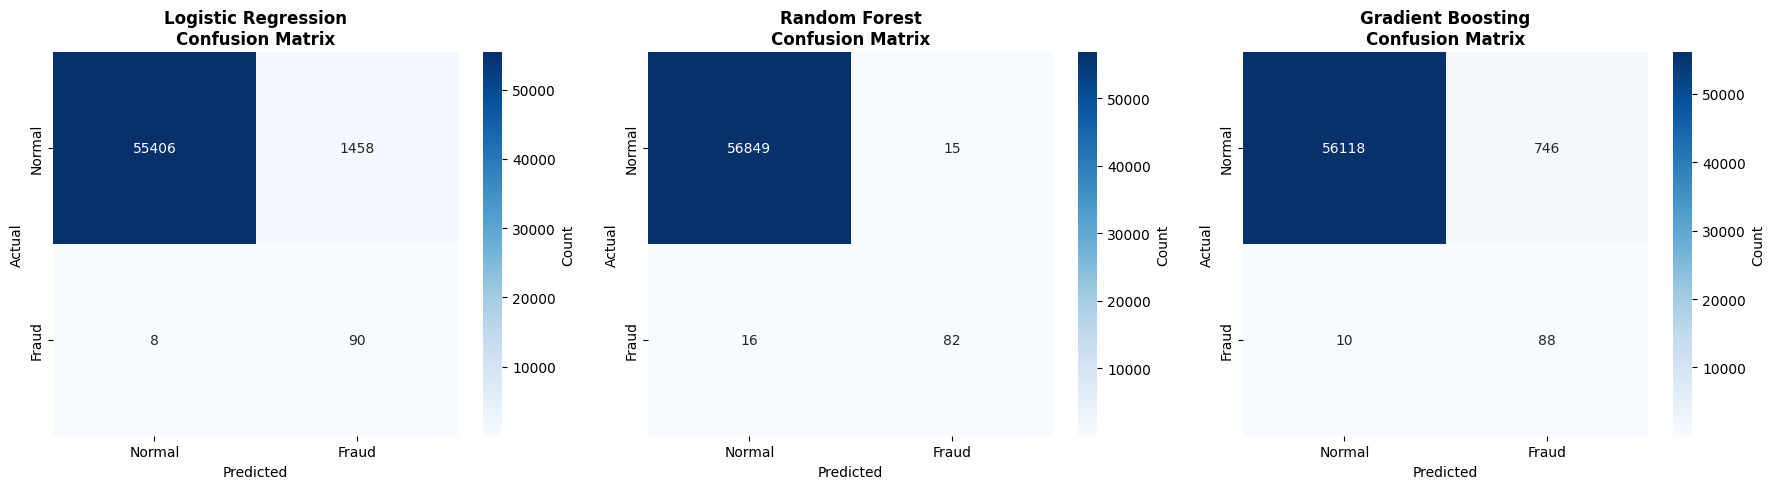

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['y_pred'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Normal', 'Fraud'],
                yticklabels=['Normal', 'Fraud'],
                cbar_kws={'label': 'Count'})
    axes[idx].set_title(f'{name}\nConfusion Matrix', fontweight='bold', fontsize=12)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### CLASSIFICATION REPORTS

In [28]:
for name, result in results.items():
    print(f"\n{name}:")
    print("-" * 60)
    print(classification_report(y_test, result['y_pred'], 
                                target_names=['Normal', 'Fraud'],
                                digits=4))


Logistic Regression:
------------------------------------------------------------
              precision    recall  f1-score   support

      Normal     0.9999    0.9744    0.9869     56864
       Fraud     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962


Random Forest:
------------------------------------------------------------
              precision    recall  f1-score   support

      Normal     0.9997    0.9997    0.9997     56864
       Fraud     0.8454    0.8367    0.8410        98

    accuracy                         0.9995     56962
   macro avg     0.9225    0.9182    0.9204     56962
weighted avg     0.9995    0.9995    0.9995     56962


Gradient Boosting:
------------------------------------------------------------
              precision    recall  f1-score   support

      Normal     0.9998    0.9869    0.9933     56

### ROC CURVES

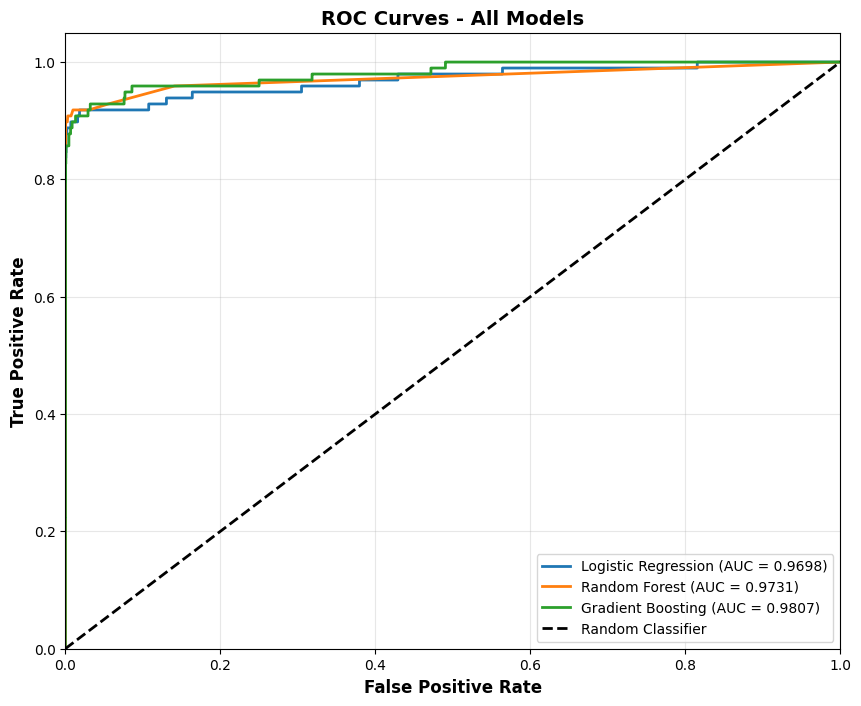

In [29]:
plt.figure(figsize=(10, 8))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    roc_auc = result['roc_auc']
    
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

### PRECISION-RECALL CURVES

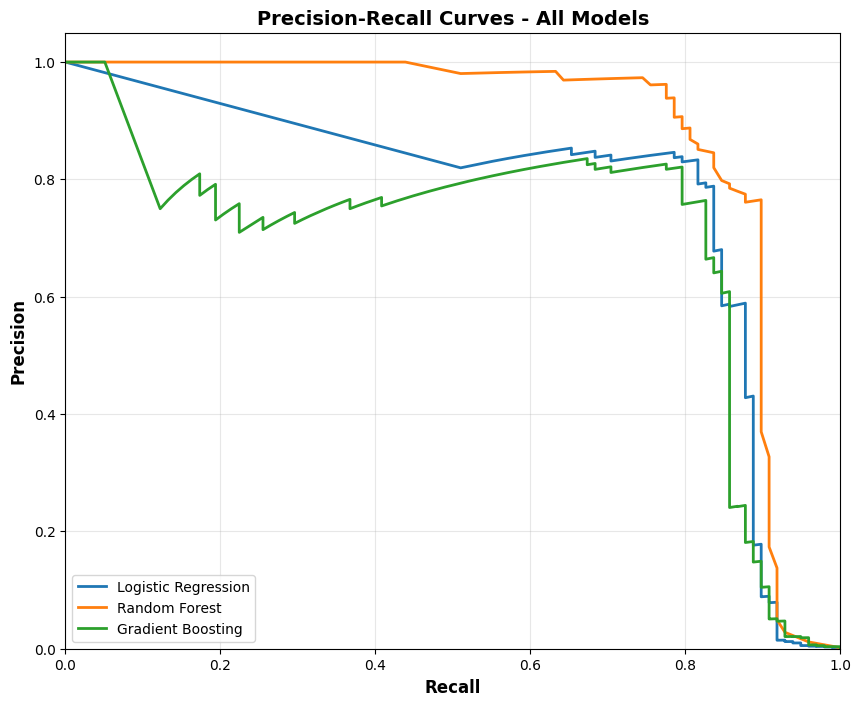

In [30]:
plt.figure(figsize=(10, 8))

for name, result in results.items():
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, result['y_pred_proba'])
    
    plt.plot(recall_curve, precision_curve, linewidth=2, label=f'{name}')

plt.xlabel('Recall', fontsize=12, fontweight='bold')
plt.ylabel('Precision', fontsize=12, fontweight='bold')
plt.title('Precision-Recall Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc="lower left", fontsize=10)
plt.grid(alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

### FEATURE IMPORTANCE

C:\Users\LEGION\AppData\Local\Temp\ipykernel_30936\4237400662.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


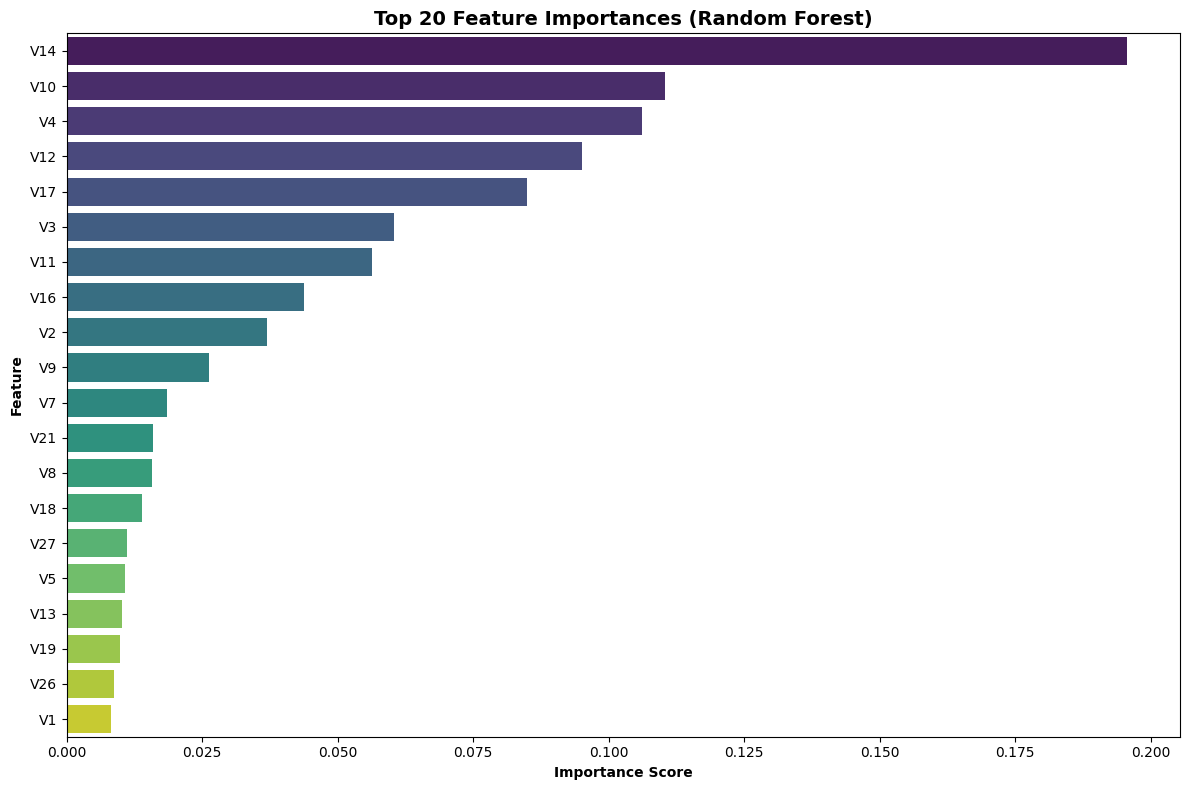


Top 10 Most Important Features:
Feature  Importance
    V14    0.195607
    V10    0.110459
     V4    0.106133
    V12    0.095085
    V17    0.085002
     V3    0.060455
    V11    0.056356
    V16    0.043757
     V2    0.036986
     V9    0.026203


In [31]:
# Get Random Forest model
rf_model = results['Random Forest']['model']

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(20)
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 20 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))


### THRESHOLD OPTIMIZATION

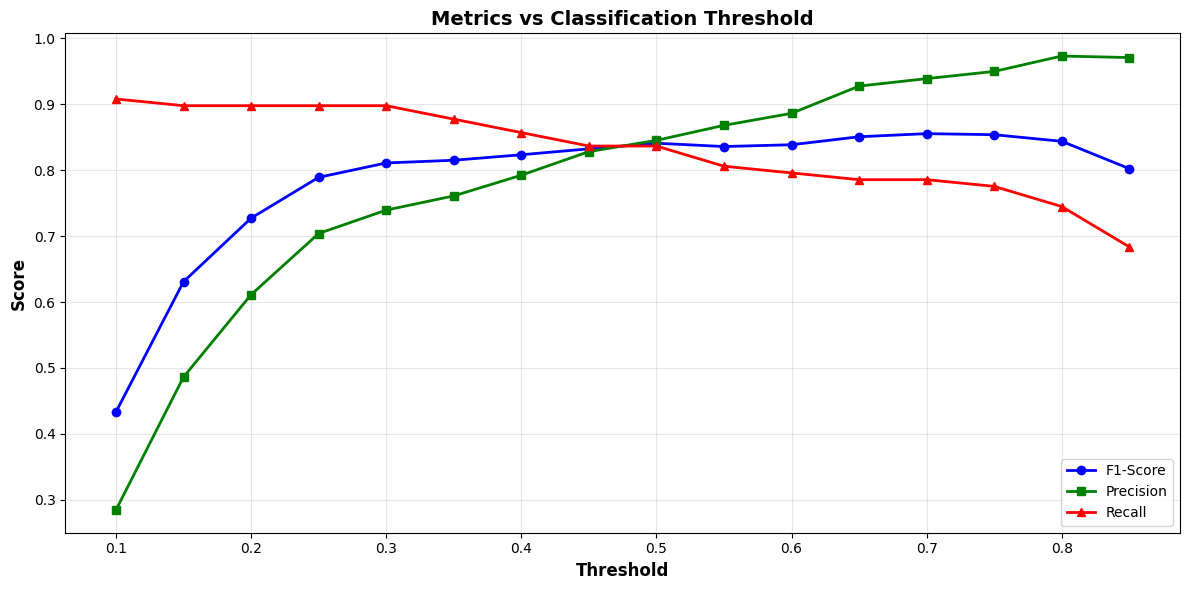

In [32]:
# Use Random Forest for threshold optimization
best_model = results['Random Forest']['model']
y_pred_proba = results['Random Forest']['y_pred_proba']

# Calculate metrics for different thresholds
thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []
precision_scores = []
recall_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))
    precision_scores.append(precision_score(y_test, y_pred_threshold))
    recall_scores.append(recall_score(y_test, y_pred_threshold))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(thresholds, f1_scores, 'b-', linewidth=2, label='F1-Score', marker='o')
plt.plot(thresholds, precision_scores, 'g-', linewidth=2, label='Precision', marker='s')
plt.plot(thresholds, recall_scores, 'r-', linewidth=2, label='Recall', marker='^')
plt.xlabel('Threshold', fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.title('Metrics vs Classification Threshold', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



In [33]:
# Find optimal threshold
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal Threshold: {optimal_threshold:.2f}")
print(f"F1-Score at optimal threshold: {f1_scores[optimal_idx]:.4f}")
print(f"Precision at optimal threshold: {precision_scores[optimal_idx]:.4f}")
print(f"Recall at optimal threshold: {recall_scores[optimal_idx]:.4f}")


Optimal Threshold: 0.70
F1-Score at optimal threshold: 0.8556
Precision at optimal threshold: 0.9390
Recall at optimal threshold: 0.7857


###  FINAL MODEL EVALUATION WITH OPTIMAL THRESHOLD


FINAL MODEL EVALUATION (Threshold = 0.70)

Confusion Matrix:
[[56859     5]
 [   21    77]]

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9996    0.9999    0.9998     56864
       Fraud     0.9390    0.7857    0.8556        98

    accuracy                         0.9995     56962
   macro avg     0.9693    0.8928    0.9277     56962
weighted avg     0.9995    0.9995    0.9995     56962



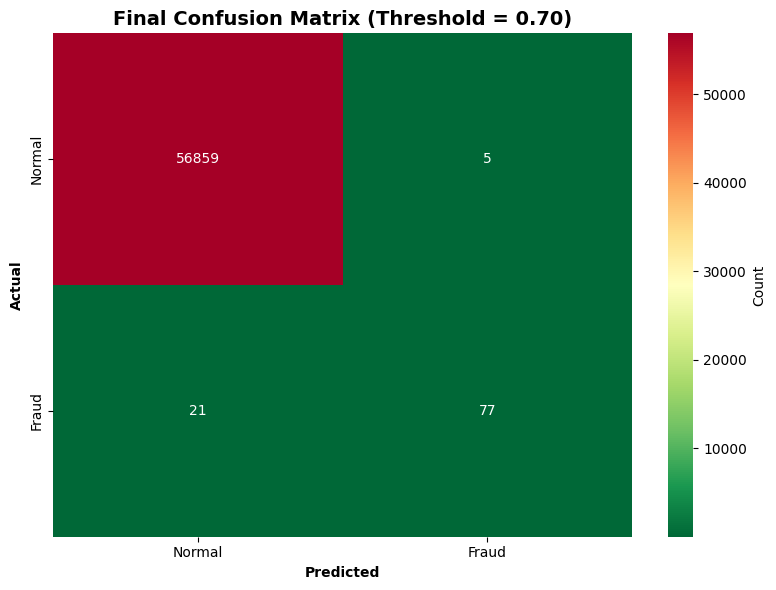

In [34]:
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

print("\n" + "="*60)
print(f"FINAL MODEL EVALUATION (Threshold = {optimal_threshold:.2f})")
print("="*60)

print("\nConfusion Matrix:")
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
print(cm_optimal)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal, 
                            target_names=['Normal', 'Fraud'],
                            digits=4))

# Visualize final confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='RdYlGn_r',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'],
            cbar_kws={'label': 'Count'})
plt.title(f'Final Confusion Matrix (Threshold = {optimal_threshold:.2f})', 
          fontweight='bold', fontsize=14)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.tight_layout()
plt.show()